# An attempt to familiarize myself with the automobile dataset using statistical analysis and machine learning.

Data source: https://archive.ics.uci.edu/ml/datasets/automobile

In [132]:
import numpy as np
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn.preprocessing as skp
import sklearn.metrics as skm
import sklearn.model_selection as skms
import sklearn.linear_model as sklm
import sklearn.svm as sksvm
import sklearn.ensemble as sken
import statsmodels.api as sm
import os, sys
%matplotlib inline

In [10]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 
        'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
df=pd.read_csv('imports-85.data', delimiter=',', names=cols, na_values='?')

In [5]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [6]:
len(cols), df.columns.shape

(26, (26,))

In [7]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.528667,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.134205,-0.008965,-0.178515,0.071622,0.274573,-0.035823,0.034606,-0.082391
normalized-losses,0.528667,1.000000,-0.074362,0.023220,0.105073,-0.432335,0.119893,0.167365,-0.036167,0.065627,-0.132654,0.295772,0.264597,-0.258502,-0.210768,0.203254
wheel-base,-0.531954,-0.074362,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.490378,0.161477,0.249786,0.352297,-0.361052,-0.470414,-0.544082,0.584642
length,-0.357612,0.023220,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.607480,0.129739,0.158414,0.555003,-0.287325,-0.670909,-0.704662,0.690628
width,-0.232919,0.105073,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559204,0.182956,0.181129,0.642482,-0.219957,-0.642704,-0.677218,0.751265
height,-0.541038,-0.432335,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.176195,-0.056999,0.261214,-0.110711,-0.322272,-0.048640,-0.107358,0.135486
curb-weight,-0.227691,0.119893,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.649045,0.168929,0.151362,0.751034,-0.266306,-0.757414,-0.797465,0.834415
engine-size,-0.105790,0.167365,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.594090,0.206675,0.028971,0.810773,-0.244618,-0.653658,-0.677470,0.872335
bore,-0.134205,-0.036167,0.490378,0.607480,0.559204,0.176195,0.649045,0.594090,1.000000,-0.055909,0.005203,0.577273,-0.264269,-0.594584,-0.594572,0.543436
stroke,-0.008965,0.065627,0.161477,0.129739,0.182956,-0.056999,0.168929,0.206675,-0.055909,1.000000,0.186170,0.090254,-0.071493,-0.042906,-0.044528,0.082310


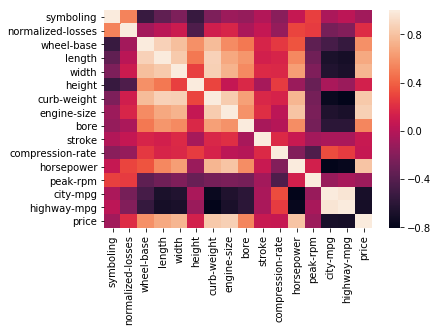

In [12]:
sns.heatmap(df.corr())

clustering won't work with NaN. Consider dropping rows that contain nan in continuous variables, though it would reduce the sample size.

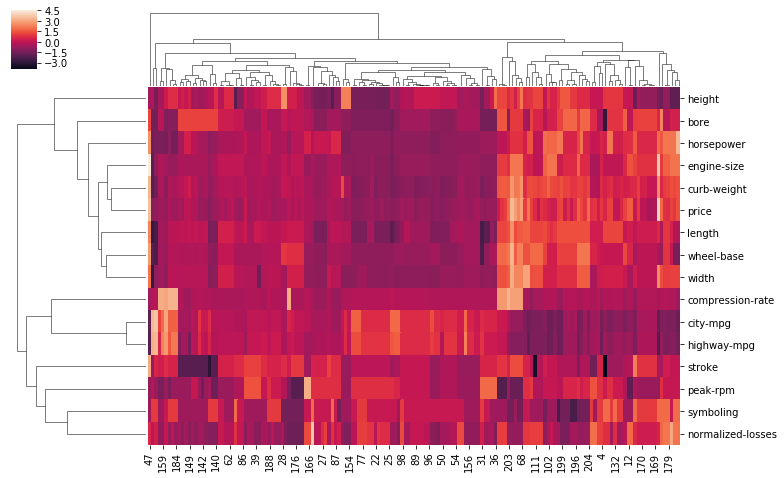

In [253]:
data=df[df.corr().columns].dropna().copy()
standardizer=skp.StandardScaler()
data[df.corr().columns]=standardizer.fit_transform(data)
g = sns.clustermap(data.T, method='average', metric='cityblock', figsize=(12,8))

### Hierarchical clustering shows some explicit correlation between physical specifications of the vehicles.

In [40]:
data.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,1.064693,1.203122,0.303904,0.371817,0.311066,0.185615,-0.255427,-0.332951,-0.406878,0.554700,-0.037497,0.200623,0.827343,-0.413424,-0.322196,0.431502
4,1.064693,1.203122,0.226198,0.371817,0.414111,0.185615,0.760441,0.557668,-0.406878,0.554700,-0.554245,0.626436,0.827343,-1.403168,-1.568149,1.030260
6,0.221372,1.034065,1.469495,1.770271,2.990229,0.802496,0.802161,0.557668,-0.406878,0.554700,-0.425058,0.462662,0.827343,-1.238211,-1.100916,1.074739
8,0.221372,1.034065,1.469495,1.770271,2.990229,0.890622,1.306966,0.392738,-0.632009,0.554700,-0.476733,1.445307,0.827343,-1.568125,-1.879637,2.129408
10,1.064693,1.992055,0.575875,0.389189,-0.410247,0.185615,-0.134441,-0.365937,0.756300,-1.491064,-0.347546,0.167868,1.474126,-0.578382,-0.477940,0.855765


In [79]:
x_cols=df.corr().columns.drop('price')
y_col='price'
X=data[x_cols]
X=sm.add_constant(X)
y=data[y_col]

In [52]:
df.shape, X.shape

((205, 26), (160, 16))

### We can verify it again with a linear regression model 

In [106]:
results = sm.OLS(y,X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     54.82
Date:                Sat, 04 Aug 2018   Prob (F-statistic):           9.26e-52
Time:                        19:59:36   Log-Likelihood:                -74.732
No. Observations:                 160   AIC:                             181.5
Df Residuals:                     144   BIC:                             230.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4.857e-17      0.03

## To include categorical variables, they need to be coded properly. Here, one hot coding is used.

In [146]:
df.columns[df.dtypes=='object']

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')

In [155]:
'''
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 
        'peak-rpm', 'city-mpg', 'highway-mpg']
'''
cat_cols=df.columns[df.dtypes=='object']
cont_cols=df.columns[df.dtypes!='object']
print(cat_cols)
print(cont_cols)
#new=pd.get_dummies(df[cat_cols])
#print(new.shape)
#new

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')
Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg',
       'price'],
      dtype='object')


In [204]:
df_new=df.dropna()
new=pd.get_dummies(df_new[cat_cols])
tmp=df_new[cont_cols].copy()
standardizer=skp.StandardScaler()
tmp[cont_cols]=standardizer.fit_transform(tmp.values)
df_new=pd.concat([tmp, new], axis=1)
new_cols=cont_cols.drop('price').tolist()+new.columns.tolist()

In [174]:
new_cols

['symboling',
 'normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-rate',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'make_audi',
 'make_bmw',
 'make_chevrolet',
 'make_dodge',
 'make_honda',
 'make_jaguar',
 'make_mazda',
 'make_mercedes-benz',
 'make_mitsubishi',
 'make_nissan',
 'make_peugot',
 'make_plymouth',
 'make_porsche',
 'make_saab',
 'make_subaru',
 'make_toyota',
 'make_volkswagen',
 'make_volvo',
 'fuel-type_diesel',
 'fuel-type_gas',
 'aspiration_std',
 'aspiration_turbo',
 'num-of-doors_four',
 'num-of-doors_two',
 'body-style_convertible',
 'body-style_hardtop',
 'body-style_hatchback',
 'body-style_sedan',
 'body-style_wagon',
 'drive-wheels_4wd',
 'drive-wheels_fwd',
 'drive-wheels_rwd',
 'engine-location_front',
 'engine-type_dohc',
 'engine-type_l',
 'engine-type_ohc',
 'engine-type_ohcf',
 'engine-type_ohcv',
 'num-of-cylinders_eight',
 'num-of-cylinders_five',
 'num-o

# Now on to the machine learning modeling. Below is a helper function to evaluate a model with given dataset (with/without categorical variables). We can also employ a cross validation or full modeling.

new_cols: with coded categorical variables

x_cols: without the categorical variables, considering only the continuous variables.

In [236]:
new_cols, x_cols

(['symboling',
  'normalized-losses',
  'wheel-base',
  'length',
  'width',
  'height',
  'curb-weight',
  'engine-size',
  'bore',
  'stroke',
  'compression-rate',
  'horsepower',
  'peak-rpm',
  'city-mpg',
  'highway-mpg',
  'make_audi',
  'make_bmw',
  'make_chevrolet',
  'make_dodge',
  'make_honda',
  'make_jaguar',
  'make_mazda',
  'make_mercedes-benz',
  'make_mitsubishi',
  'make_nissan',
  'make_peugot',
  'make_plymouth',
  'make_porsche',
  'make_saab',
  'make_subaru',
  'make_toyota',
  'make_volkswagen',
  'make_volvo',
  'fuel-type_diesel',
  'fuel-type_gas',
  'aspiration_std',
  'aspiration_turbo',
  'num-of-doors_four',
  'num-of-doors_two',
  'body-style_convertible',
  'body-style_hardtop',
  'body-style_hatchback',
  'body-style_sedan',
  'body-style_wagon',
  'drive-wheels_4wd',
  'drive-wheels_fwd',
  'drive-wheels_rwd',
  'engine-location_front',
  'engine-type_dohc',
  'engine-type_l',
  'engine-type_ohc',
  'engine-type_ohcf',
  'engine-type_ohcv',
  'num-

In [222]:
def evaluate_clf_2(clf, x, y, cv=None):
    if cv is None:
        clf.fit(x, y)
        pred=clf.predict(x)
        t = 'Full modelling:'
    else:
        pred = skms.cross_val_predict(clf, x, y, cv=cv)
        t = 'XVal %s:' % cv
    print('MSE %s %.3f' % (t, skm.mean_squared_error(y, pred)))
    g=sns.scatterplot(x=y, y=pred)
    aa=np.linspace(-2,5)
    g.axes.plot(aa,aa, 'r')
    g.axes.set_ylim(-2,5)
    g.axes.set_xlim(-2,5)
    plt.show()

MSE XVal LeaveOneOut(): 0.106


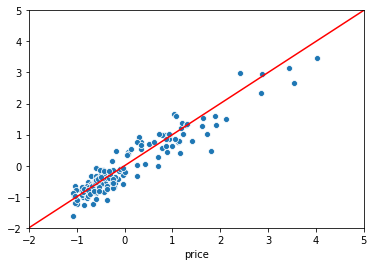

In [230]:
clf=sklm.LinearRegression()
evaluate_clf_2(clf, df_new[new_cols], df_new['price'], cv=skms.LeaveOneOut())

MSE XVal LeaveOneOut(): 0.210


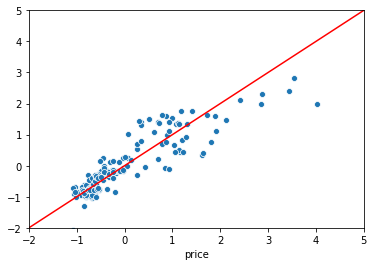

In [237]:
clf=sklm.LinearRegression()
evaluate_clf_2(clf, df_new[x_cols], df_new['price'], cv=skms.LeaveOneOut())

MSE XVal LeaveOneOut(): 0.091


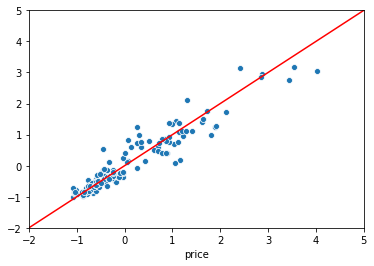

In [231]:
clf = xgb.XGBRegressor(n_jobs=2, random_state=1)
evaluate_clf_2(clf, df_new[new_cols], df_new['price'], cv=skms.LeaveOneOut())

MSE XVal LeaveOneOut(): 0.090


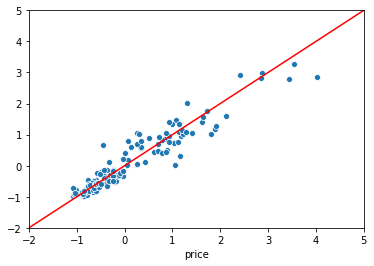

In [238]:
clf = xgb.XGBRegressor(n_jobs=2, random_state=1)
evaluate_clf_2(clf, df_new[x_cols], df_new['price'], cv=skms.LeaveOneOut())

MSE XVal LeaveOneOut(): 0.181


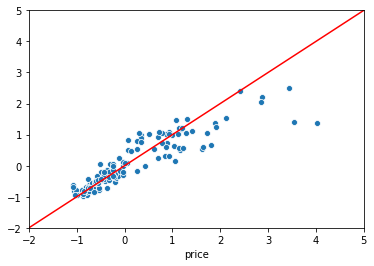

In [232]:
clf=sksvm.SVR(kernel='rbf')
evaluate_clf_2(clf, df_new[new_cols], df_new['price'], cv=skms.LeaveOneOut())

## From the quick experiments shown above, we can see that gradient boosting regressor outperformed the traditional logistic regression in leave one out cross validation (MSE 0.091 vs 0.106) considering both continuous and categorical variables. SVM with non-linear kernel (rbf) had the worst performance (MSE 0.181)

## However, this dataset is rather clean and small. And it does not seem to contain any information related to history of the vehicles.

-----------
Additional experiments below.

MSE Full modelling: 0.011


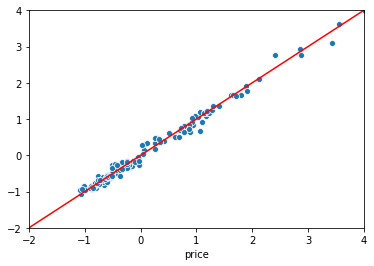

In [214]:
clf=sken.GradientBoostingRegressor(min_samples_leaf=5, min_samples_split=7, random_state=1)
evaluate_clf_2(clf, df_new[new_cols], df_new['price'])

MSE XVal LeaveOneOut(): 0.104


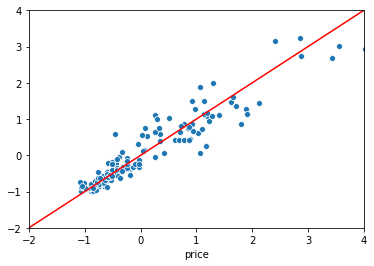

In [215]:
clf=sken.GradientBoostingRegressor(min_samples_leaf=5, min_samples_split=7, random_state=1)
evaluate_clf_2(clf, df_new[new_cols], df_new['price'], cv=skms.LeaveOneOut())

MSE XVal LeaveOneOut(): 0.094


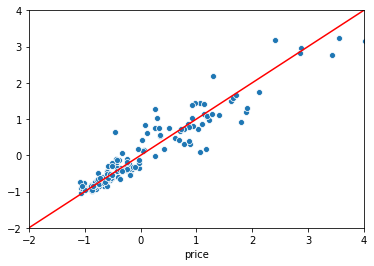

In [218]:
clf = xgb.XGBRegressor(n_estimators=200, n_jobs=2, random_state=1)
evaluate_clf_2(clf, df_new[new_cols], df_new['price'], cv=skms.LeaveOneOut())

MSE XVal LeaveOneOut(): 0.093


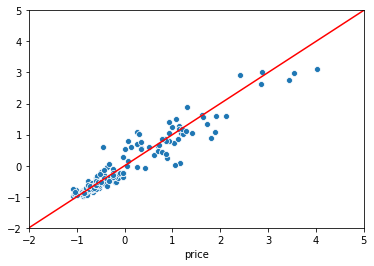

In [229]:
clf = xgb.XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, n_jobs=2, random_state=1)
evaluate_clf_2(clf, df_new[new_cols], df_new['price'], cv=skms.LeaveOneOut())

In [197]:
df_new_all=df.dropna(subset=['price'])
new=pd.get_dummies(df_new_all[cat_cols])
df_new_all=pd.concat([df_new_all[cont_cols], new], axis=1)
new_cols=cont_cols.drop('price').tolist()+new.columns.tolist()

In [199]:
df_new_all.shape

(201, 75)

MSE XVal LeaveOneOut(): 4307793.546


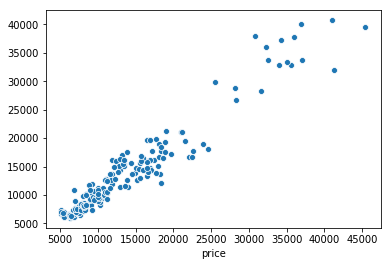

In [202]:
clf = xgb.XGBRegressor(n_jobs=2, random_state=1, missing=np.nan)
evaluate_clf_2(clf, df_new_all[new_cols], df_new_all['price'], cv=skms.LeaveOneOut())